In [6]:
import numpy as np
from matplotlib import rcParams, animation, pyplot as plt
from scipy import linalg as la
#%matplotlib inline
plt.switch_backend('qt5agg')

In [2]:
def array_max(x,y) :
    if len(x) != len(y) :
        raise ValueError("Arrays must be of same length.")
    z = np.zeros_like(x)
    for i in range(len(x)) :
        z[i] = max(x[i],y[i])
    return z

def update(U,lmbda) :
    V = np.zeros_like(U)
    V[1:-1] = lmbda*U[:-2] + (1-2*lmbda)*U[1:-1] + lmbda*U[2:]
    return V

### Problem 1

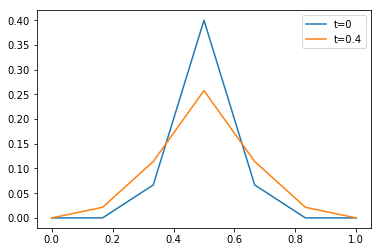

In [3]:
x_min = 0
x_max = 1
x_inter = 6
t_min = 0
t_max = 0.4
t_inter = 10

X = np.linspace(x_min,x_max,x_inter+1)
T = np.linspace(t_min,t_max,t_inter+1)

nu = 0.05
h = X[1]-X[0]
k = T[1]-T[0]
lmbda = nu*k/h**2

#rngs_1 = np.arange(x_inter)
#rngs_2 = np.arange(1,x_inter+1)
#rngs_diag = (1-2*lmbda)*np.ones_like(rngs_1)
    
u_xmin = lambda t : 0
u_xmax = lambda t : 0
u_tmin = lambda x : 2*array_max(.2*np.ones_like(x)-np.abs(x-.5),np.zeros_like(x))
U = np.zeros((x_inter+1,t_inter+1))
U_init = u_tmin(X)
U[:,0] = U_init
for i in range(1,t_inter+1) :
    U[:,i] = update(U[:,i-1],lmbda)
plt.plot(X,U[:,0],label='t=0')
plt.plot(X,U[:,4],label='t=0.4')
plt.legend(loc=0)
#plt.title("t=0")
plt.show()

### Problem 2

In [3]:
x_min = -12
x_max = 12
x_inter = 140
t_min = 0
t_max = 1
t_inter = 70

X = np.linspace(x_min,x_max,x_inter+1)
T = np.linspace(t_min,t_max,t_inter+1)

nu = 1
h = X[1]-X[0]
k = T[1]-T[0]
lmbda = nu*k/h**2

#rngs_1 = np.arange(x_inter)
#rngs_2 = np.arange(1,x_inter+1)
#rngs_diag = (1-2*lmbda)*np.ones_like(rngs_1)
    
u_xmin = lambda t : 0
u_xmax = lambda t : 0
u_tmin = lambda x : array_max(1-x**2,np.zeros_like(x))
U = np.zeros((x_inter+1,t_inter+1))
U_init = u_tmin(X)
U[:,0] = U_init
for i in range(1,t_inter+1) :
    U[:,i] = update(U[:,i-1],lmbda)

In [4]:
def U_animation(X,U) :
    f = plt.figure()
    plt.axes(xlim=(np.min(X),np.max(X)),ylim=(np.min(U),np.max(U)))
    line, = plt.plot([], [])
    
    def animate(i) :
        line.set_data(X, U[:,i])
        return line,
    
    a = animation.FuncAnimation(f, animate, frames=(t_inter+1), interval=20)
    
    plt.show()

U_animation(X,U)

With only 66 t intervals :

In [5]:
x_min = -12
x_max = 12
x_inter = 140
t_min = 0
t_max = 1
t_inter = 66

X = np.linspace(x_min,x_max,x_inter+1)
T = np.linspace(t_min,t_max,t_inter+1)

nu = 1
h = X[1]-X[0]
k = T[1]-T[0]
lmbda = nu*k/h**2

#rngs_1 = np.arange(x_inter)
#rngs_2 = np.arange(1,x_inter+1)
#rngs_diag = (1-2*lmbda)*np.ones_like(rngs_1)
    
u_xmin = lambda t : 0
u_xmax = lambda t : 0
u_tmin = lambda x : array_max(1-x**2,np.zeros_like(x))
U = np.zeros((x_inter+1,t_inter+1))
U_init = u_tmin(X)
U[:,0] = U_init
for i in range(1,t_inter+1) :
    U[:,i] = update(U[:,i-1],lmbda)
U_animation(X,U)

### Problem 3

In [25]:
def Crank_Nick_update(U,lmbda) :
    V = np.zeros_like(U)
    V[1:-1] = (2*lmbda*U[:-2] + (1-3*lmbda**2)*U[1:-1] + 2*lmbda*U[2:])/(1+4*lmbda+lmbda**2)
    return V

US = {}
HS = []
NS = [20,40,80,160,320,640]
for inters in NS :
    x_min = -12
    x_max = 12
    x_inter = inters
    t_min = 0
    t_max = 1
    t_inter = inters

    X = np.linspace(x_min,x_max,x_inter+1)
    T = np.linspace(t_min,t_max,t_inter+1)

    nu = 1
    h = X[1]-X[0]
    if inters != 640 :
        HS.append(h)
    k = T[1]-T[0]
    lmbda = nu*k/(2*h**2)

    #rngs_1 = np.arange(x_inter)
    #rngs_2 = np.arange(1,x_inter+1)
    #rngs_diag = (1-2*lmbda)*np.ones_like(rngs_1)

    u_xmin = lambda t : 0
    u_xmax = lambda t : 0
    u_tmin = lambda x : array_max(1-x**2,np.zeros_like(x))
    U = np.zeros((x_inter+1,t_inter+1))
    U_init = u_tmin(X)
    U[:,0] = U_init
    for i in range(1,t_inter+1) :
        U[:,i] = Crank_Nick_update(U[:,i-1],lmbda)
    US[inters]=U
x = np.linspace(min(HS),max(HS),len(HS))
y = x**2
FINAL = US[NS[-1]][::32,-1]
Y = []
for n in NS[:-1] :
    V = US[n][-1]
    s = len(V)
    V = V[::(s//20)]
    Y.append(np.max(np.abs(V - FINAL)))
plt.loglog(x,Y,'.-k',label='Error E(h)')
plt.loglog(x,y,'r',label='h^2')
plt.show()